<a href="https://colab.research.google.com/github/thangpro1242002/-.-n-R-/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
%matplotlib inline

sep = "\t"

In [ ]:
df = pd.read_csv("turtles.csv", sep=sep)
print(df)

     ID Sex  length  width  height
0   T25   F      98     81      38
1   T26   F     103     84      38
2   T27   F     103     86      42
3   T28   F     105     86      40
4   T29   F     109     88      44
5   T30   F     123     92      50
6   T31   F     123     95      46
7   T32   F     133     99      51
8   T33   F     133    102      51
9   T34   F     133    102      51
10  T35   F     134    100      48
11  T36   F     136    102      49
12  T37   F     137     98      51
13  T38   F     138     99      51
14  T39   F     141    105      53
15  T40   F     147    108      57
16  T41   F     149    107      55
17  T42   F     153    107      56
18  T43   F     155    115      63
19  T44   F     155    117      60
20  T45   F     158    115      62
21  T46   F     159    118      63
22  T47   F     162    124      61
23  T48   F     177    132      67
24   T1   M      93     74      37
25   T2   M      94     78      35
26   T3   M      96     80      35
27   T4   M     101 

In [ ]:
# chúng ta chọn các cột mong muốn theo tên tiêu đề với DataFrame.loc, sau đó lấy lại các giá trị dưới dạng numpy ndarray với DataFrame.values
features = ["length", "width", "height"]
x = df.loc[:, features].values

x = StandardScaler().fit_transform(x)
dfx = pd.DataFrame(x, columns=features) # quay lại dataframe

In [ ]:
features = ["length", "width", "height"]
x = df.loc[:, features].values  # chúng tôi không chọn "Sex".

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    x = StandardScaler().fit_transform(x)
    dfx = pd.DataFrame(x, columns=features)

In [ ]:
dfx.head(20)

,length,width,height
0,-1.316787,-1.151031,-1.003417
1,-1.070083,-0.911856,-1.003417
2,-1.070083,-0.752406,-0.521777
3,-0.971401,-0.752406,-0.762597
4,-0.774037,-0.592955,-0.280957
5,-0.083263,-0.274055,0.441504
6,-0.083263,-0.034880,-0.040137
7,0.410147,0.284021,0.561914
8,0.410147,0.523196,0.561914
9,0.410147,0.523196,0.561914


In [ ]:
for feature in features:
    print(f"{feature} average: {np.average(dfx[feature])} std: {np.std(dfx[feature])}")

length average: -1.850371707708594e-17 std: 1.0
width average: 0.0 std: 1.0
height average: -2.7755575615628914e-16 std: 1.0


In [ ]:
# === thực hiện phân tích trên dữ liệu được thu nhỏ ===

n_components = 2
whiten = True

# khởi tạo pca
pca = PCA(n_components=n_components, whiten=whiten)

PC = pca.fit_transform(x)

dfPC = pd.DataFrame(PC, columns=["PC1", "PC2"])
dfPC["Sex"] = df["Sex"] # lấy thông tin giới tính

dfPC.head(20)

,PC1,PC2,Sex
0,-1.157738,0.807548,F
1,-0.995436,-0.128592,F
2,-0.782197,1.374335,F
3,-0.829218,0.285269,F
4,-0.550007,1.481525,F
5,0.027368,2.478302,F
6,-0.052810,0.054038,F
7,0.418589,0.889620,F
8,0.498425,0.336818,F
9,0.498425,0.336818,F


Text(0.5, 1.0, 'PC on scaled, whitened data')

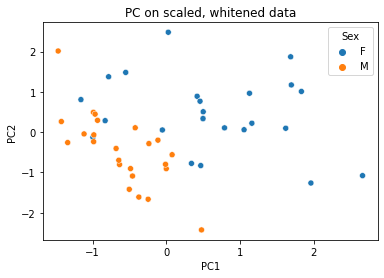

In [ ]:
fig = plt.figure()
ax = sns.scatterplot(data=dfPC, x="PC1", y="PC2", hue="Sex")
ax.set_title("PC on scaled, whitened data")

In [ ]:
pca.explained_variance_ratio_

array([0.97857922, 0.01428129])

In [ ]:
round(100 - sum(pca.explained_variance_ratio_)*100, 2)

0.71

In [ ]:
pca.components_

array([[ 0.57879812,  0.57798399,  0.57526276],
       [-0.32502731, -0.48346989,  0.81278171]])

In [ ]:
for vector in pca.components_:
    print(sum(vector ** 2))

1.0
1.0000000000000004


In [ ]:
pca_noscale_black = PCA(n_components=2, whiten=False)
PC_noscale_black = pca_noscale_black.fit_transform(df.iloc[:, [2,3,4]])
dfPC_noscale_black = pd.DataFrame(PC_noscale_black, columns=["PC1", "PC2"])
dfPC_noscale_black["Sex"] = df["Sex"]


pca_scale_black = PCA(n_components=2, whiten=False)
PC_scale_black = pca_scale_black.fit_transform(x)
dfPC_scale_black = pd.DataFrame(PC_scale_black, columns=["PC1", "PC2"])
dfPC_scale_black["Sex"] = df["Sex"] 


pca_noscale_white = PCA(n_components=2, whiten=True)
PC_noscale_white = pca_noscale_white.fit_transform(df.iloc[:, [2,3,4]])
dfPC_noscale_white = pd.DataFrame(PC_noscale_white, columns=["PC1", "PC2"])
dfPC_noscale_white["Sex"] = df["Sex"]

Text(0.5, 1.0, 'Scaled, whitened')

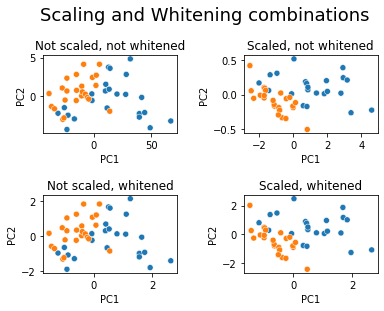

In [ ]:
fig = plt.figure()
fig.suptitle("Scaling and Whitening combinations", fontsize=18, y=1.05)
fig.subplots_adjust(hspace=0.8, wspace=0.5)

ax = fig.add_subplot(2,2,1)
ax = sns.scatterplot(data=dfPC_noscale_black, x="PC1", y="PC2", hue="Sex")
ax.legend().set_visible(False)
ax.set_title("Not scaled, not whitened")

ax = fig.add_subplot(2,2,2)
ax = sns.scatterplot(data=dfPC_scale_black, x="PC1", y="PC2", hue="Sex")
ax.legend().set_visible(False)
ax.set_title("Scaled, not whitened")

ax = fig.add_subplot(2,2,3)
ax = sns.scatterplot(data=dfPC_noscale_white, x="PC1", y="PC2", hue="Sex")
ax.legend().set_visible(False)
ax.set_title("Not scaled, whitened")

ax = fig.add_subplot(2,2,4)
ax = sns.scatterplot(data=dfPC, x="PC1", y="PC2", hue="Sex")
ax.legend().set_visible(False)
ax.set_title("Scaled, whitened")

In [ ]:
analyses = [dfPC_noscale_black, dfPC_scale_black, dfPC_noscale_white, dfPC]
descriptions=[
    "not scaled, not whitened",
    "scaled, not whitened    ",
    "not scaled, whitened    ",
    "scaled, whitened        "
]

for data, descr in zip(analyses, descriptions):
    ave_pc1 = np.average(data["PC1"])
    ave_pc2 = np.average(data["PC2"])
    sd_pc1  = np.std(data["PC1"])
    sd_pc2  = np.std(data["PC2"])
    print(f"{descr} PC1: {abs(round(ave_pc1,1))} ± {round(sd_pc1,1)} {sep}PC2: {abs(round(ave_pc2,1))} ± {round(sd_pc2,1)}")

not scaled, not whitened PC1: 0.0 ± 25.1 	PC2: 0.0 ± 2.3
scaled, not whitened     PC1: 0.0 ± 1.7 	PC2: 0.0 ± 0.2
not scaled, whitened     PC1: 0.0 ± 1.0 	PC2: 0.0 ± 1.0
scaled, whitened         PC1: 0.0 ± 1.0 	PC2: 0.0 ± 1.0


In [ ]:
analyses_PC = [pca_noscale_black, pca_scale_black, pca_noscale_white, pca]
for analysis, descr in zip(analyses_PC, descriptions):
    print(f"{descr}: {analysis.explained_variance_ratio_}")

not scaled, not whitened: [0.986113   0.00799921]
scaled, not whitened    : [0.97857922 0.01428129]
not scaled, whitened    : [0.986113   0.00799921]
scaled, whitened        : [0.97857922 0.01428129]
